In [2]:
import functools
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.integrate as scint
import scipy.interpolate as scinterp
xr.set_options(keep_attrs=True)
import cmath
from Functions import *


In [9]:
WA_10 = np.load("GBWA_E=150mj_PXe=10torr_fstart=20cm_fstop=100cm.npy")
NA_10 = np.load("GBNA_E=150mj_PXe=10torr_fstart=20cm_bstop=100cm.npy")


WA_25=np.load("GBWA_E=150mj_PXe=25torr_fstart=20cm_fstop=100cm.npy")
NA_25 = np.load("GBNA_E=150mj_PXe=25torr_fstart=20cm_bstop=100cm.npy")

WA_100=np.load("GBWA_E=150mj_PXe=100torr_fstart=20cm_fstop=100cm.npy")
NA_100 = np.load("GBNA_E=150mj_PXe=100torr_fstart=20cm_bstop=100cm.npy")

WA_200=np.load("GBWA_E=150mj_PXe=200torr_fstart=20cm_fstop=100cm.npy")
NA_200 = np.load("GBNA_E=150mj_PXe=200torr_fstart=20cm_bstop=100cm.npy")


In [10]:
WA_10 = WA_10[:,:,0]
NA_10 = NA_10[:,:,0]

WA_25 = WA_25[:,:,0]
NA_25 = NA_25[:,:,0]

WA_100= WA_100[:,:,0]
NA_100 = NA_100[:,:,0]

WA_200 = WA_200[:,:,0]
NA_200 = NA_200[:,:,0]

In [6]:
b = np.linspace(f_to_b(0.5e-2,20e-2),f_to_b(0.5e-2,100e-2),10)
dk = np.linspace(2/b[-1],2/b[1],10)
b_, dk_ = np.meshgrid(b, dk)


In [ ]:
levels= [0,5e32,7.5e32,1e33,2.5e33,5e33,7.5e33,1e34,2.5e34]

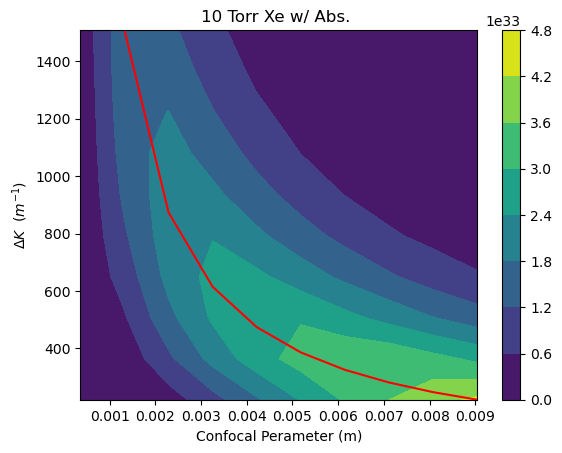

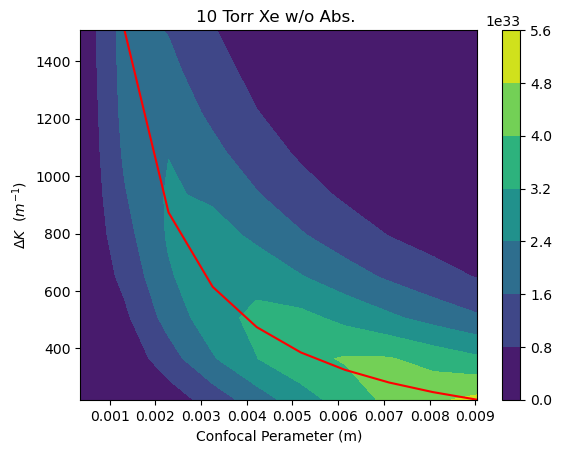

In [129]:

plt.contourf(b_,dk_,WA_10)
plt.plot(b,2/b,color='r')
plt.ylim(2/b[-1],2/b[1])
plt.colorbar()
plt.ylabel("$\Delta K $  $(m^{-1})$")
plt.xlabel("Confocal Perameter (m)")
plt.title("10 Torr Xe w/ Abs. ")
plt.show()


plt.contourf(b_,dk_,NA_10,)
plt.plot(b,2/b,color='r')
plt.ylim(2/b[-1],2/b[1])
plt.colorbar()
plt.ylabel("$\Delta K $  $(m^{-1})$")
plt.xlabel("Confocal Perameter (m)")
plt.title("10 Torr Xe w/o Abs. ")
plt.show()




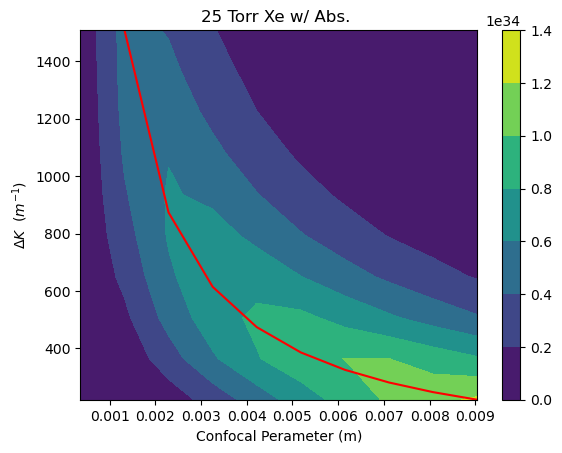

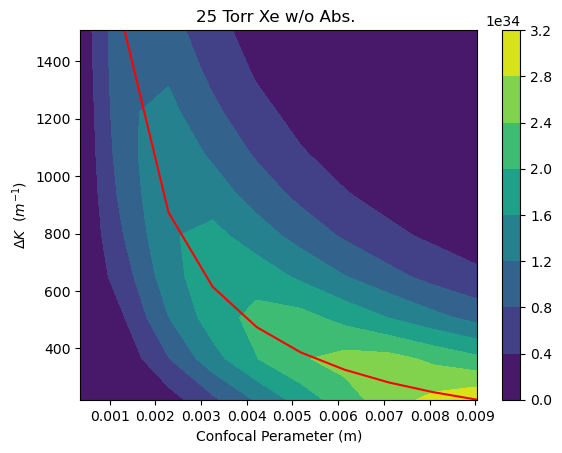

In [130]:

plt.contourf(b_,dk_,WA_25 )
plt.plot(b,2/b,color='r')
plt.ylim(2/b[-1],2/b[1])
plt.colorbar()
plt.ylabel("$\Delta K $  $(m^{-1})$")
plt.xlabel("Confocal Perameter (m)")
plt.title("25 Torr Xe w/ Abs. ")
plt.show()


plt.contourf(b_,dk_,NA_25 )
plt.plot(b,2/b,color='r')
plt.ylim(2/b[-1],2/b[1])
plt.colorbar()
plt.ylabel("$\Delta K $  $(m^{-1})$")
plt.xlabel("Confocal Perameter (m)")
plt.title("25 Torr Xe w/o Abs. ")
plt.show()



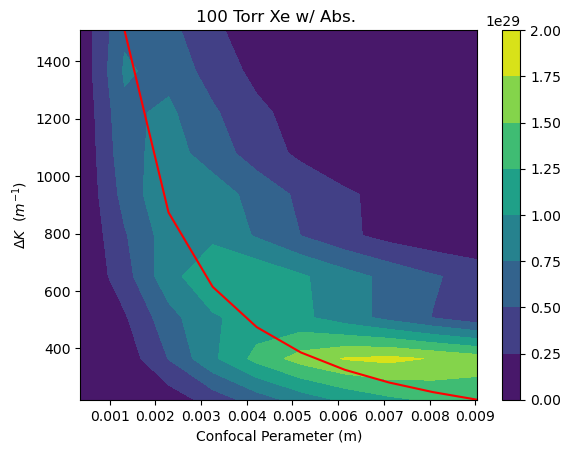

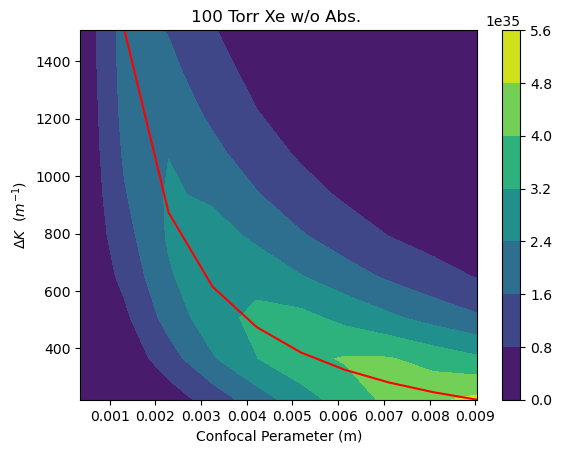

In [131]:

plt.contourf(b_,dk_,WA_100)
plt.plot(b,2/b,color='r')
plt.ylim(2/b[-1],2/b[1])
plt.colorbar()
plt.ylabel("$\Delta K $  $(m^{-1})$")
plt.xlabel("Confocal Perameter (m)")
plt.title("100 Torr Xe w/ Abs. ")
plt.show()


plt.contourf(b_,dk_,NA_100)
plt.plot(b,2/b,color='r')
plt.ylim(2/b[-1],2/b[1])
plt.colorbar()
plt.ylabel("$\Delta K $  $(m^{-1})$")
plt.xlabel("Confocal Perameter (m)")
plt.title("100 Torr Xe w/o Abs. ")
plt.show()



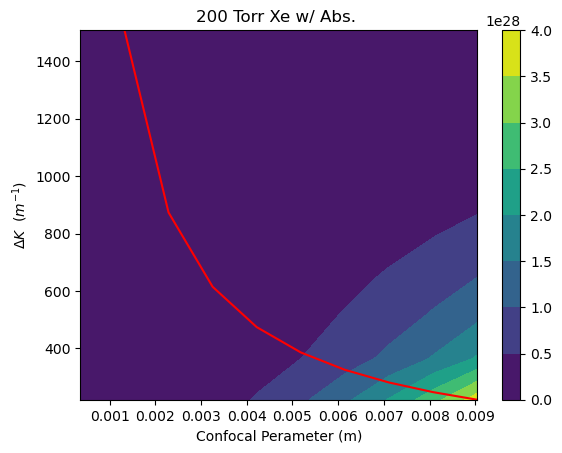

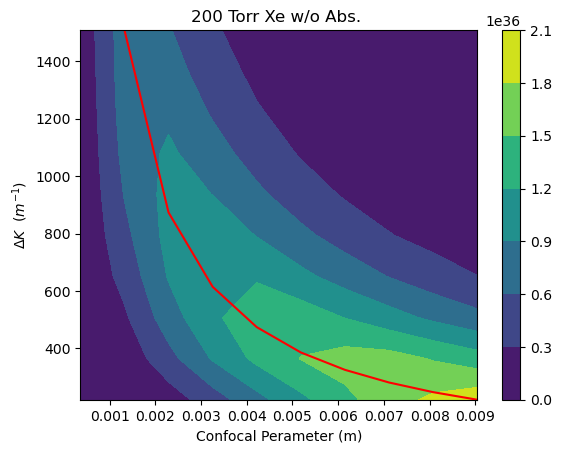

In [132]:

plt.contourf(b_,dk_,WA_200)
plt.plot(b,2/b,color='r')
plt.ylim(2/b[-1],2/b[1])
plt.colorbar()
plt.ylabel("$\Delta K $  $(m^{-1})$")
plt.xlabel("Confocal Perameter (m)")
plt.title("200 Torr Xe w/ Abs. ")
plt.show()


plt.contourf(b_,dk_,NA_200)
plt.plot(b,2/b,color='r')
plt.ylim(2/b[-1],2/b[1])
plt.colorbar()
plt.ylabel("$\Delta K $  $(m^{-1})$")
plt.xlabel("Confocal Perameter (m)")
plt.title("200 Torr Xe w/o Abs. ")
plt.show()



In [12]:
b_to_f(0.5e-2,b)

array([0.2       , 0.38297327, 0.50332553, 0.60000349, 0.68313345,
       0.75719085, 0.82462366, 0.88694415, 0.94516411, 1.        ])

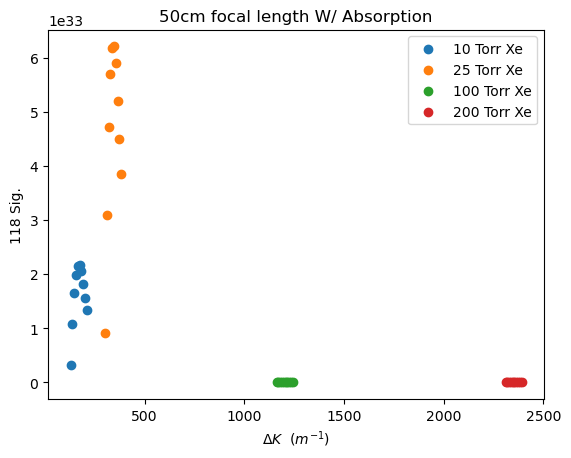

Text(0, 0.5, '118 Sig.')

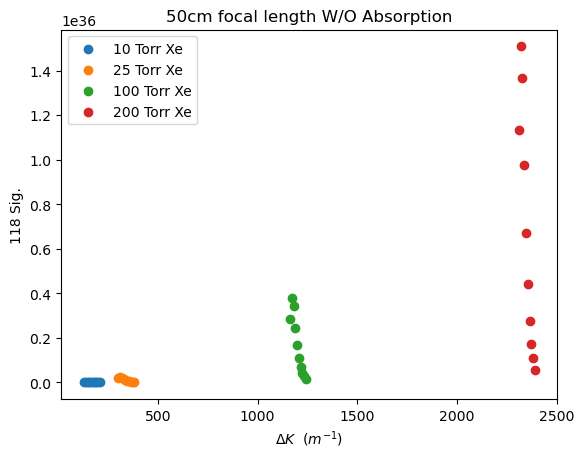

In [38]:
plt.scatter(dk_to_PAr(dk,10),WA_10[:,2])
plt.scatter(dk_to_PAr(dk,25),WA_25[:,2])
plt.scatter(dk_to_PAr(dk,100),WA_100[:,2])
plt.scatter(dk_to_PAr(dk,200),WA_200[:,2])

plt.legend(['10 Torr Xe','25 Torr Xe','100 Torr Xe','200 Torr Xe'])

plt.title('50cm focal length W/ Absorption')
plt.xlabel("$\Delta K $  $(m^{-1})$")
plt.ylabel("118 Sig.")

plt.show()

plt.scatter(dk_to_PAr(dk,10),NA_10[:,5])
plt.scatter(dk_to_PAr(dk,25),NA_25[:,5])
plt.scatter(dk_to_PAr(dk,100),NA_100[:,5])
plt.scatter(dk_to_PAr(dk,200),NA_200[:,5])

plt.legend(['10 Torr Xe','25 Torr Xe','100 Torr Xe','200 Torr Xe'])

plt.title('50cm focal length W/O Absorption')
plt.xlabel("$\Delta K $  $(m^{-1})$")
plt.ylabel("118 Sig.")



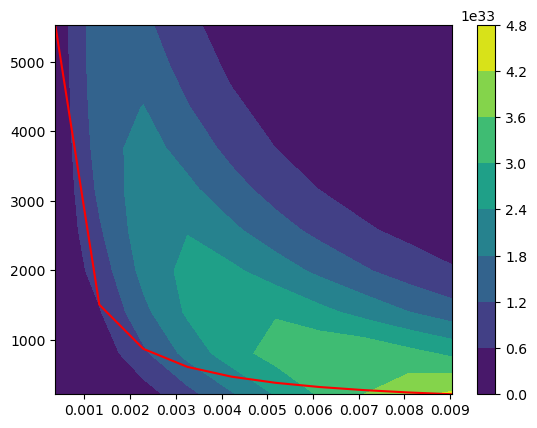

In [67]:
b_, dk_ = np.meshgrid(b, dk)
plt.contourf(b_,dk_,WA_10)
plt.plot(b,2/b,color='r')
plt.colorbar()
plt.show()
#plt.savefig(NA_Name)

In [24]:
dk_to_PAr(dk,100)

array([1162.05343336, 1170.99783702, 1179.94224069, 1188.88664436,
       1197.83104803, 1206.7754517 , 1215.71985536, 1224.66425903,
       1233.6086627 , 1242.55306637])

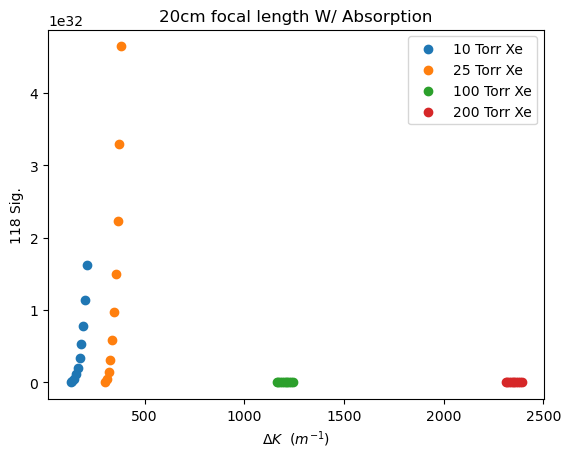

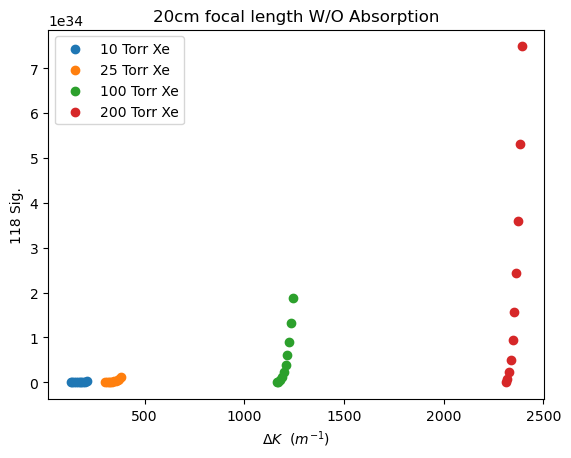

In [32]:
PXe = 25
CXe= -6.12E-31 #m^2
CAr = 5.33E-22 #m^2
NXe= PXe*Torr_to_m3

PAr = (dk - NXe*CXe)/CAr

plt.scatter(dk_to_PAr(dk,10),WA_10[:,0])
plt.scatter(dk_to_PAr(dk,25),WA_25[:,0])
plt.scatter(dk_to_PAr(dk,100),WA_100[:,0])
plt.scatter(dk_to_PAr(dk,200),WA_200[:,0])

plt.legend(['10 Torr Xe','25 Torr Xe','100 Torr Xe','200 Torr Xe'])

plt.title('20cm focal length W/ Absorption')
plt.xlabel("$\Delta K $  $(m^{-1})$")
plt.ylabel("118 Sig.")


plt.show()

plt.scatter(dk_to_PAr(dk,10),NA_10[:,0])
plt.scatter(dk_to_PAr(dk,25),NA_25[:,0])
plt.scatter(dk_to_PAr(dk,100),NA_100[:,0])
plt.scatter(dk_to_PAr(dk,200),NA_200[:,0])

plt.legend(['10 Torr Xe','25 Torr Xe','100 Torr Xe','200 Torr Xe'])

plt.title('20cm focal length W/O Absorption')
plt.xlabel("$\Delta K $  $(m^{-1})$")
plt.ylabel("118 Sig.")

plt.show()


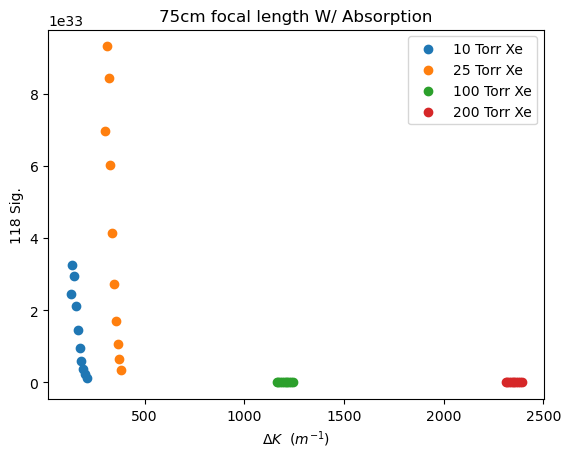

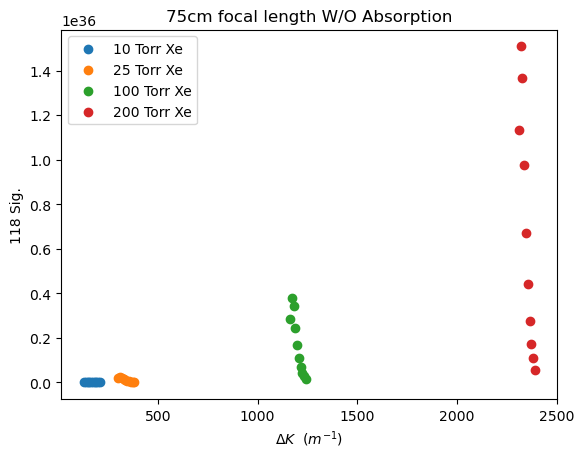

In [34]:
plt.scatter(dk_to_PAr(dk,10),WA_10[:,5])
plt.scatter(dk_to_PAr(dk,25),WA_25[:,5])
plt.scatter(dk_to_PAr(dk,100),WA_100[:,5])
plt.scatter(dk_to_PAr(dk,200),WA_200[:,5])

plt.legend(['10 Torr Xe','25 Torr Xe','100 Torr Xe','200 Torr Xe'])

plt.title('75cm focal length W/ Absorption')
plt.xlabel("$\Delta K $  $(m^{-1})$")
plt.ylabel("118 Sig.")

plt.show()
plt.scatter(dk_to_PAr(dk,10),NA_10[:,5])
plt.scatter(dk_to_PAr(dk,25),NA_25[:,5])
plt.scatter(dk_to_PAr(dk,100),NA_100[:,5])
plt.scatter(dk_to_PAr(dk,200),NA_200[:,5])

plt.legend(['10 Torr Xe','25 Torr Xe','100 Torr Xe','200 Torr Xe'])

plt.title('75cm focal length W/O Absorption')
plt.xlabel("$\Delta K $  $(m^{-1})$")
plt.ylabel("118 Sig.")

plt.show()


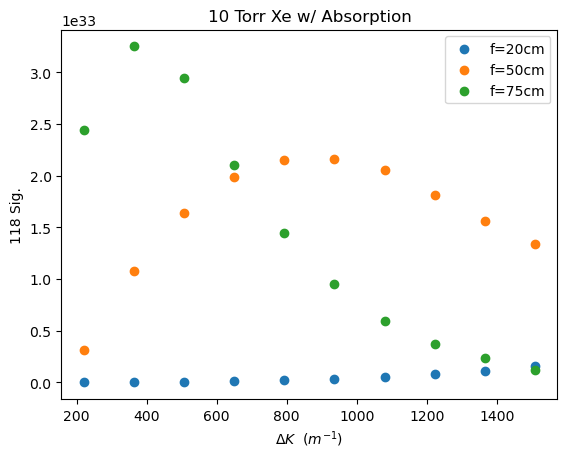

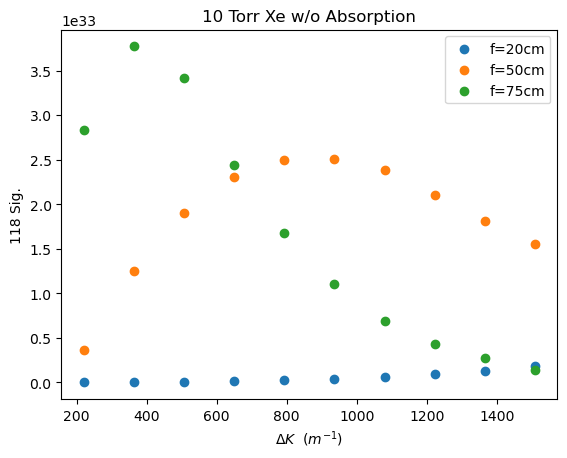

In [16]:

plt.scatter(dk,WA_10[:,0])
plt.scatter(dk,WA_10[:,2])
plt.scatter(dk,WA_10[:,5])

plt.legend(['f=20cm','f=50cm','f=75cm'])

plt.title('10 Torr Xe w/ Absorption')
plt.xlabel("$\Delta K $  $(m^{-1})$")
plt.ylabel("118 Sig.")

plt.show()

plt.scatter(dk,NA_10[:,0])
plt.scatter(dk,NA_10[:,2])
plt.scatter(dk,NA_10[:,5])

plt.legend(['f=20cm','f=50cm','f=75cm'])

plt.title('10 Torr Xe w/o Absorption')
plt.xlabel("$\Delta K $  $(m^{-1})$")
plt.ylabel("118 Sig.")

plt.show()

In [ ]:

plt.scatter(dk,WA_25[:,0])
plt.scatter(dk,WA_25[:,2])
plt.scatter(dk,WA_25[:,5])

plt.legend(['f=20cm','f=50cm','f=75cm'])

plt.title('25 Torr Xe w/ Absorption')
plt.xlabel("$\Delta K $  $(m^{-1})$")
plt.ylabel("118 Sig.")

plt.show()

plt.scatter(dk,NA_25[:,0])
plt.scatter(dk,NA_25[:,2])
plt.scatter(dk,NA_25[:,5])

plt.legend(['f=20cm','f=50cm','f=75cm'])

plt.title('25 Torr Xe w/o Absorption')
plt.xlabel("$\Delta K $  $(m^{-1})$")
plt.ylabel("118 Sig.")

plt.show()

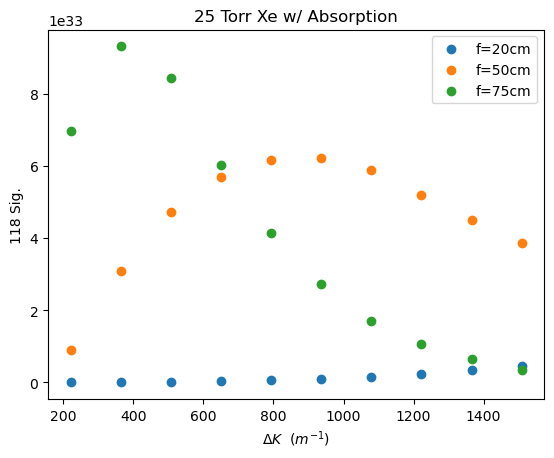

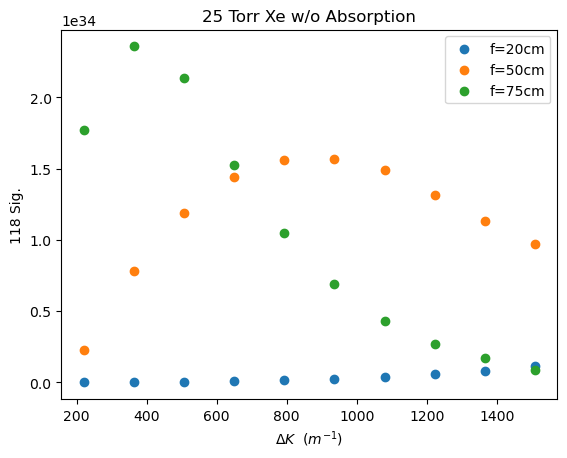

In [12]:

plt.scatter(dk,WA_25[:,0])
plt.scatter(dk,WA_25[:,2])
plt.scatter(dk,WA_25[:,5])

plt.legend(['f=20cm','f=50cm','f=75cm'])

plt.title('25 Torr Xe w/ Absorption')
plt.xlabel("$\Delta K $  $(m^{-1})$")
plt.ylabel("118 Sig.")

plt.show()

plt.scatter(dk,NA_25[:,0])
plt.scatter(dk,NA_25[:,2])
plt.scatter(dk,NA_25[:,5])

plt.legend(['f=20cm','f=50cm','f=75cm'])

plt.title('25 Torr Xe w/o Absorption')
plt.xlabel("$\Delta K $  $(m^{-1})$")
plt.ylabel("118 Sig.")

plt.show()

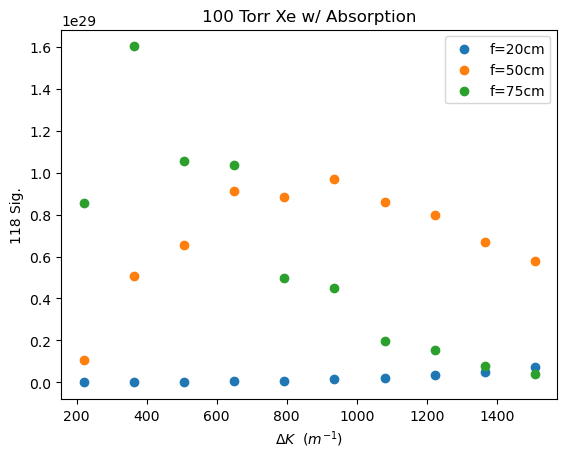

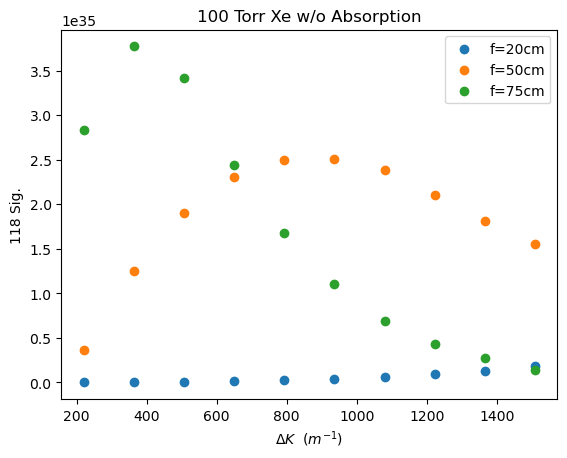

In [18]:

plt.scatter(dk,WA_100[:,0])
plt.scatter(dk,WA_100[:,2])
plt.scatter(dk,WA_100[:,5])

plt.legend(['f=20cm','f=50cm','f=75cm'])

plt.title('100 Torr Xe w/ Absorption')
plt.xlabel("$\Delta K $  $(m^{-1})$")
plt.ylabel("118 Sig.")

plt.show()

plt.scatter(dk,NA_100[:,0])
plt.scatter(dk,NA_100[:,2])
plt.scatter(dk,NA_100[:,5])

plt.legend(['f=20cm','f=50cm','f=75cm'])

plt.title('100 Torr Xe w/o Absorption')
plt.xlabel("$\Delta K $  $(m^{-1})$")
plt.ylabel("118 Sig.")

plt.show()

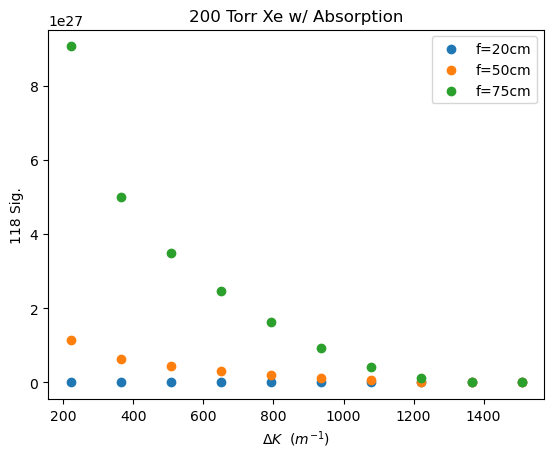

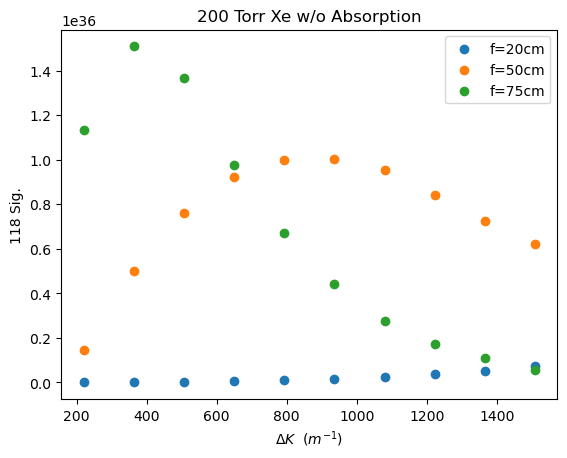

In [20]:

plt.scatter(dk,WA_200[:,0])
plt.scatter(dk,WA_200[:,2])
plt.scatter(dk,WA_200[:,5])

plt.legend(['f=20cm','f=50cm','f=75cm'])

plt.title('200 Torr Xe w/ Absorption')
plt.xlabel("$\Delta K $  $(m^{-1})$")
plt.ylabel("118 Sig.")

plt.show()

plt.scatter(dk,NA_200[:,0])
plt.scatter(dk,NA_200[:,2])
plt.scatter(dk,NA_200[:,5])

plt.legend(['f=20cm','f=50cm','f=75cm'])

plt.title('200 Torr Xe w/o Absorption')
plt.xlabel("$\Delta K $  $(m^{-1})$")
plt.ylabel("118 Sig.")

plt.show()